In [4]:
files = ["data/CX113C.contig_breadth.txt",
            "data/CX113E.contig_breadth.txt",
            "data/CX115H.contig_breadth.txt",
            "data/CX1138.contig_breadth.txt"]

contig_dict = {"JALAAU020000001.1":"Bear",
                "NC_000001.11":"Human",
                "NC_006583.3":"Dog",
                "NC_010443.5":"Pig",
                "NC_037328.1":"Cow",
                "NC_045614.1":"Ermine",
                "NC_091684.1":"Horse",
                "NC_132780.1":"Fox"}

In [5]:
import pandas as pd

dfs = []

for f in files:
    df = pd.read_csv(
        f,
        sep=r"\s+",
        names=["contig", "value"]
    )
    df["species"] = df["contig"].map(contig_dict)
    df["file"] = f
    dfs.append(df)

data = pd.concat(dfs, ignore_index=True)


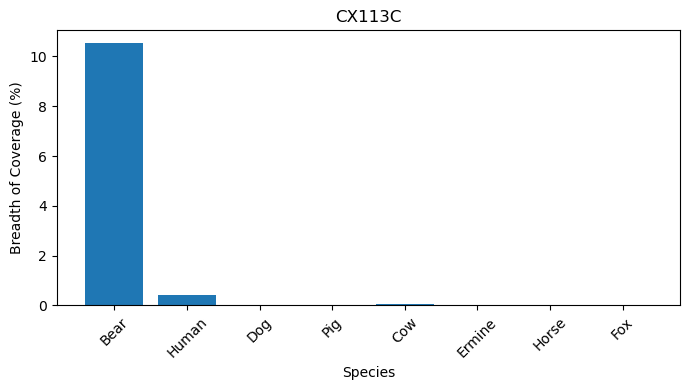

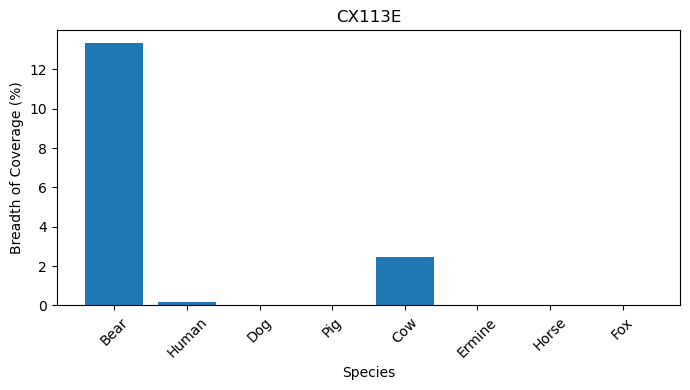

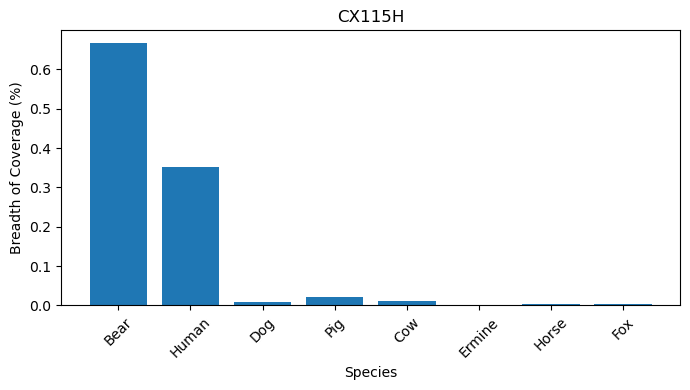

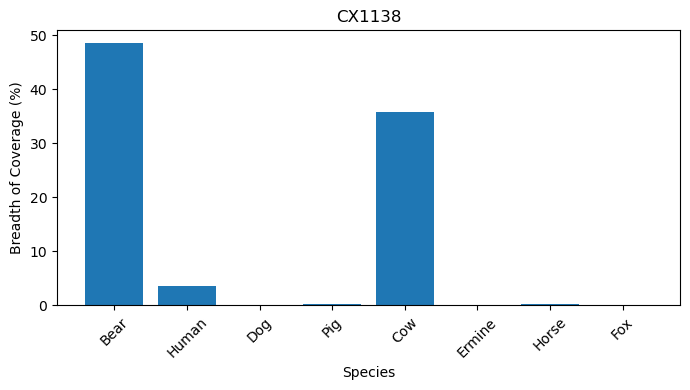

In [15]:
import matplotlib.pyplot as plt
import re
import os

for f in files:
    subset = data[data["file"] == f]

    plt.figure(figsize=(7, 4))
    plt.bar(subset["species"], subset["value"])
    plt.title(os.path.basename(f).replace(".contig_breadth.txt", ""))
    plt.xlabel("Species")
    plt.ylabel("Breadth of Coverage (%)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(re.sub(r'\.txt$', '.png', os.path.basename(f)))
    plt.show()
